In [1]:
pip install folium

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
d = pd.read_excel(r"C:\Users\rahul\Desktop\Monaco.xlsx")

In [4]:
monaco_coords = [43.7347, 7.4206]
map_monaco = folium.Map(location=monaco_coords, zoom_start=15)
folium.Marker(
    location=monaco_coords,
    popup='Monaco Grand Prix Circuit',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(map_monaco)
map_monaco.save('monaco_grand_prix_map.html')
map_monaco

In [5]:
d     # looking at the data set

,Position,Driver Name,Team,Points
0,1,Charles Leclerc,FERRARI,25
1,2,Oscar Piastri,MCLAREN MERCEDES,18
2,3,Carlos Sainz,FERRARI,15
3,4,Lando Norris,MCLAREN MERCEDES,12
4,5,George Russell,MERCEDES,10
5,6,Max Verstappen,RB HONDA RBPT,8
6,7,Lewis Hamilton,MERCEDES,7
7,8,Yuki Tsunoda,RB HONDA RBPT,4
8,9,Alexander Albon,WILLIAMS MERCEDES,2
9,10,Pierre Gasly,ALPINE RENAULT,1


In [6]:
d.isnull().sum()    #checking missing vslues

Position       0
Driver Name    0
Team           0
Points         0
dtype: int64

In [7]:
d.dtypes             #verifing data types

Position        int64
Driver Name    object
Team           object
Points          int64
dtype: object

In [8]:
duplicates = d.duplicated().sum()
duplicates                           # Duplicates

0

In [9]:
d['Team '].str.upper().str.strip()             # Standardize team names, Found out Team column has space.
#d.columns

0                          FERRARI
1                 MCLAREN MERCEDES
2                          FERRARI
3                 MCLAREN MERCEDES
4                         MERCEDES
5                    RB HONDA RBPT
6                         MERCEDES
7                    RB HONDA RBPT
8                WILLIAMS MERCEDES
9                   ALPINE RENAULT
10    ASTON MARTIN ARAMCO MERCEDES
11                   RB HONDA RBPT
12             KICK SAUBER FERRARI
13    ASTON MARTIN ARAMCO MERCEDES
14               WILLIAMS MERCEDES
15             KICK SAUBER FERRARI
16                  ALPINE RENAULT
17      RED BULL RACING HONDA RBPT
18                    HAAS FERRARI
19                    HAAS FERRARI
Name: Team , dtype: object

In [10]:
d.rename(columns={'Team ': 'Team'}, inplace=True)
d.rename(columns={'Points': 'Points'}, inplace=True)         # Changing Team name
d

,Position,Driver Name,Team,Points
0,1,Charles Leclerc,FERRARI,25
1,2,Oscar Piastri,MCLAREN MERCEDES,18
2,3,Carlos Sainz,FERRARI,15
3,4,Lando Norris,MCLAREN MERCEDES,12
4,5,George Russell,MERCEDES,10
5,6,Max Verstappen,RB HONDA RBPT,8
6,7,Lewis Hamilton,MERCEDES,7
7,8,Yuki Tsunoda,RB HONDA RBPT,4
8,9,Alexander Albon,WILLIAMS MERCEDES,2
9,10,Pierre Gasly,ALPINE RENAULT,1


In [11]:
d['Team'] = d['Team'].str.title()           # Capitalizing Team column
d

,Position,Driver Name,Team,Points
0,1,Charles Leclerc,Ferrari,25
1,2,Oscar Piastri,Mclaren Mercedes,18
2,3,Carlos Sainz,Ferrari,15
3,4,Lando Norris,Mclaren Mercedes,12
4,5,George Russell,Mercedes,10
5,6,Max Verstappen,Rb Honda Rbpt,8
6,7,Lewis Hamilton,Mercedes,7
7,8,Yuki Tsunoda,Rb Honda Rbpt,4
8,9,Alexander Albon,Williams Mercedes,2
9,10,Pierre Gasly,Alpine Renault,1


In [12]:
d.describe()                  # Descriptive Statistics

,Position,Points
count,20.00000,20.00000
mean,10.50000,5.10000
std,5.91608,7.36921
min,1.00000,0.00000
25%,5.75000,0.00000
50%,10.50000,0.50000
75%,15.25000,8.50000
max,20.00000,25.00000


C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


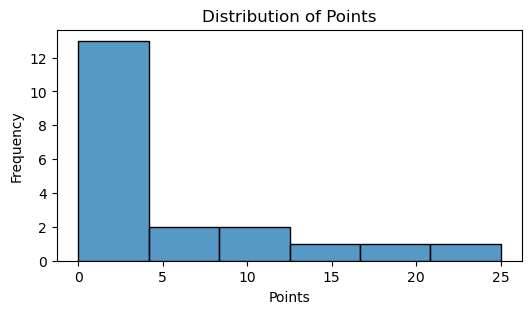

In [13]:
plt.figure(figsize=(6, 3))
sns.histplot(d['Points'])                     # Historgram graph of showing how many drivers have got 0 points
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

In [14]:
top_drivers = d.sort_values(by='Points', ascending=False).head(10)           # Top drivers of 1st 10 drivers who  
top_drivers

,Position,Driver Name,Team,Points
0,1,Charles Leclerc,Ferrari,25
1,2,Oscar Piastri,Mclaren Mercedes,18
2,3,Carlos Sainz,Ferrari,15
3,4,Lando Norris,Mclaren Mercedes,12
4,5,George Russell,Mercedes,10
5,6,Max Verstappen,Rb Honda Rbpt,8
6,7,Lewis Hamilton,Mercedes,7
7,8,Yuki Tsunoda,Rb Honda Rbpt,4
8,9,Alexander Albon,Williams Mercedes,2
9,10,Pierre Gasly,Alpine Renault,1


In [15]:
top_teams = d.groupby('Team')['Points'].sum().sort_values(ascending=False).reset_index()   #Top teams
top_teams

,Team,Points
0,Ferrari,40
1,Mclaren Mercedes,30
2,Rb Honda Rbpt,12
3,Mercedes,10
4,Mercedes,7
5,Williams Mercedes,2
6,Alpine Renault,1
7,Aston Martin Aramco Mercedes,0
8,Haas Ferrari,0
9,Kick Sauber Ferrari,0


In [16]:
correlation = d[['Position', 'Points']].corr()           # Correlation between position and points
correlation  

,Position,Points
Position,1.000000,-0.857136
Points,-0.857136,1.000000


In [17]:
print(d.columns)

Index(['Position', 'Driver Name', 'Team', 'Points'], dtype='object')


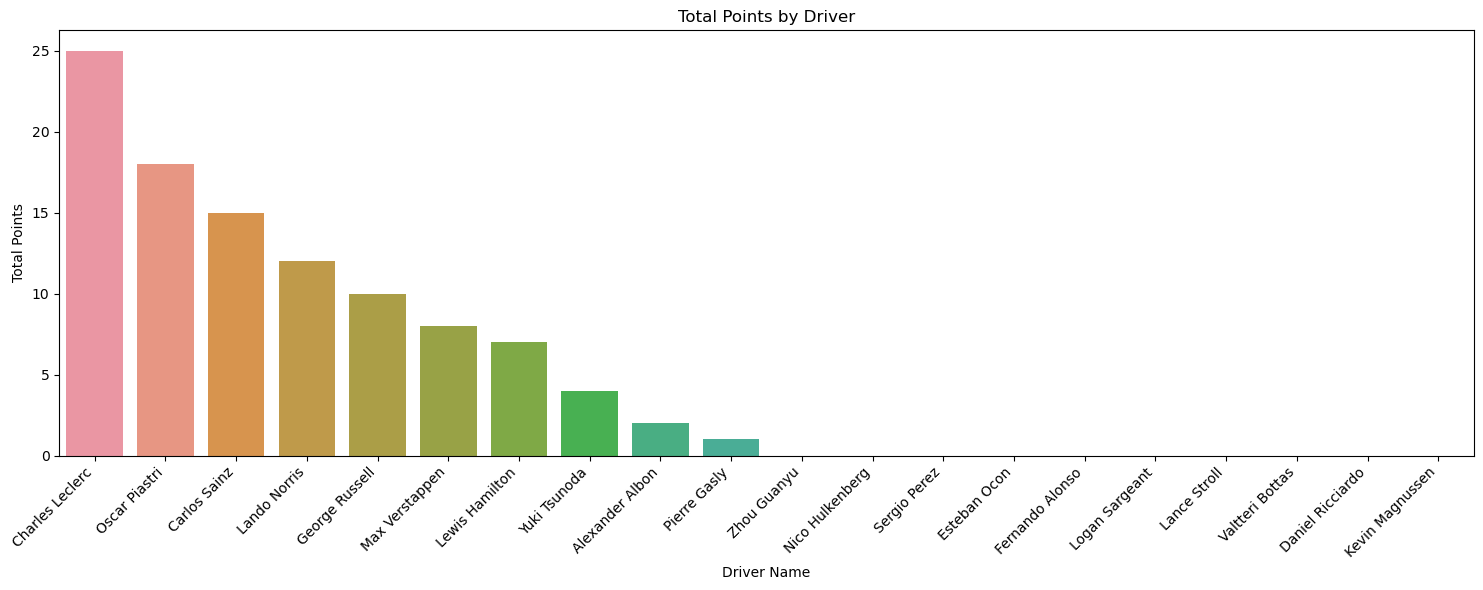

In [18]:
plt.figure(figsize=(15, 6))
df = d.sort_values(by='Points', ascending=False)
sns.barplot(x='Driver Name', y='Points', data=df)
plt.title('Total Points by Driver')
plt.xlabel('Driver Name')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10592\3210708193.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Team', y='Points', data=d, ci = None)


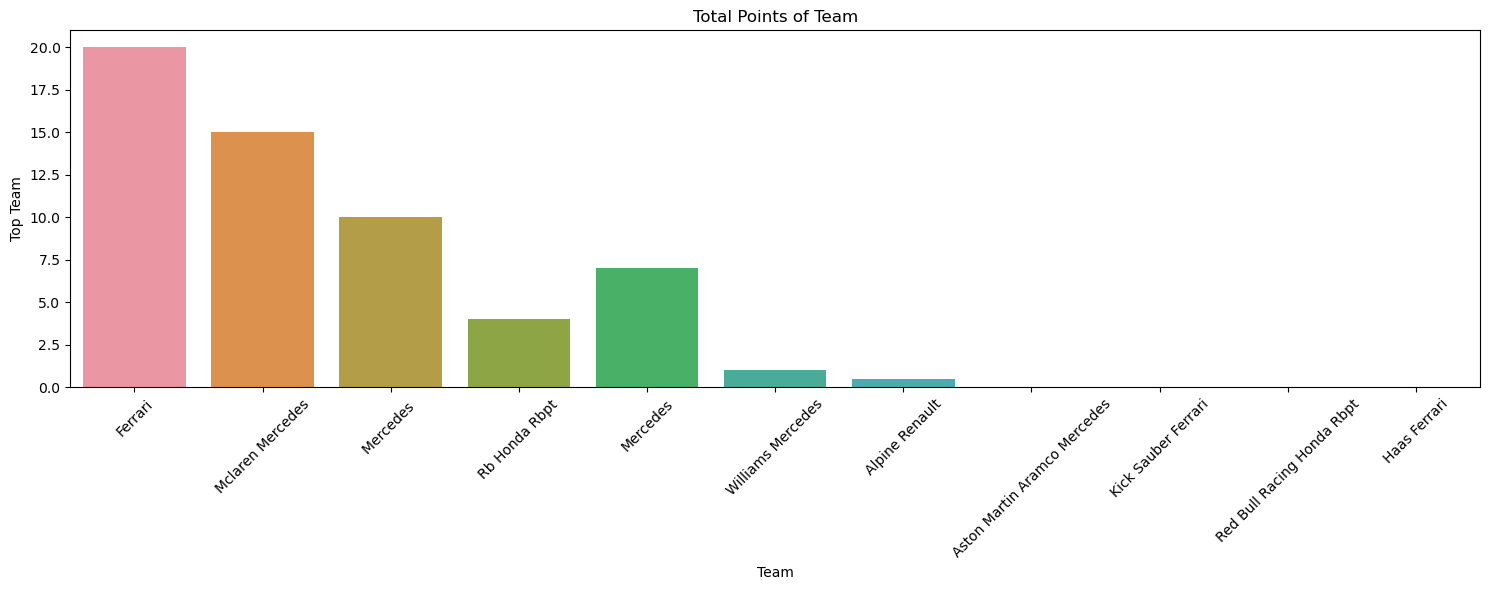

In [19]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Team', y='Points', data=d, ci = None)
plt.title('Total Points of Team')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.ylabel('Top Team')
plt.tight_layout()
plt.show()

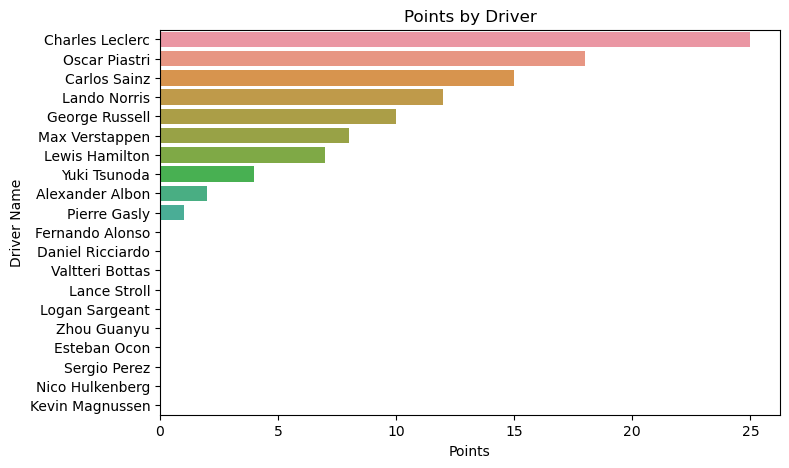

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Points',y='Driver Name', data = d)
plt.title("Points by Driver")
plt.xlabel('Points')
plt.ylabel('Driver Name')
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10592\2602617143.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Points', y = 'Team', data =d , ci=None)


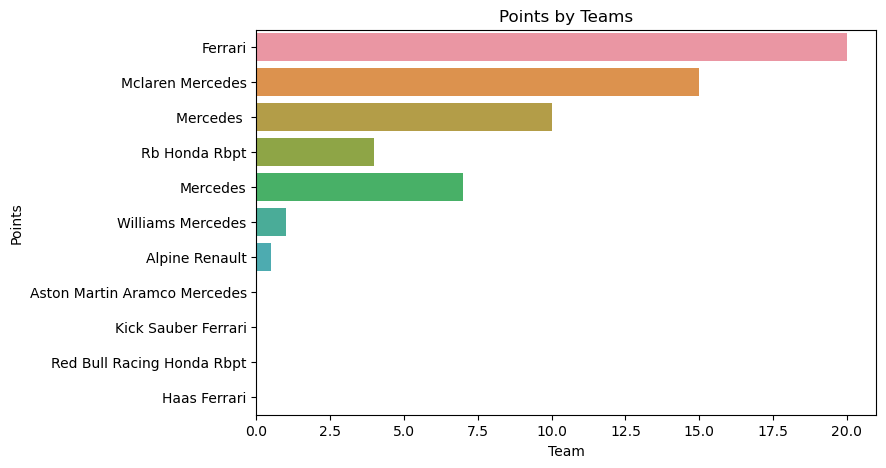

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'Points', y = 'Team', data =d , ci=None)
plt.title('Points by Teams')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

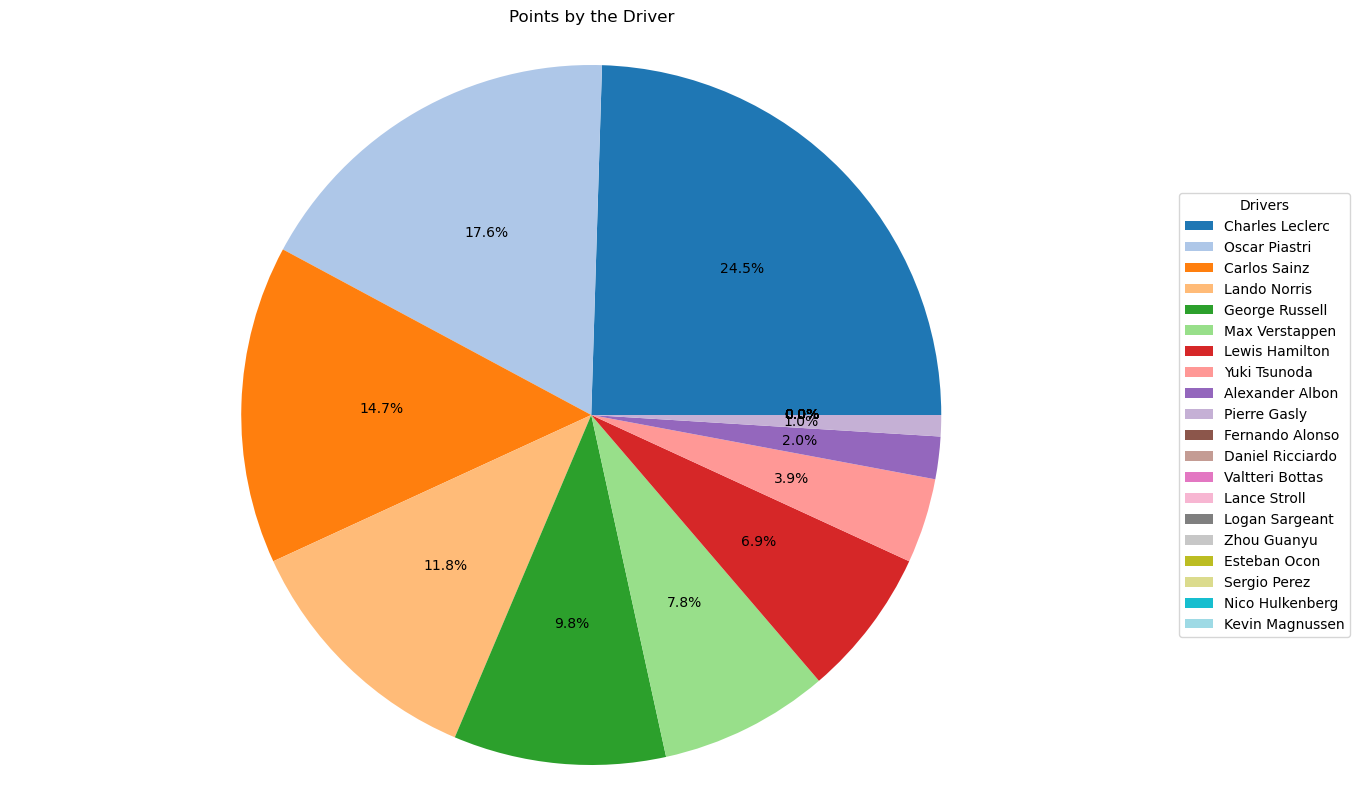

In [22]:
drivers = d['Driver Name']
points = d['Points']

plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(points, labels=None, autopct='%1.1f%%', startangle=360, colors=plt.cm.tab20.colors)

plt.legend(wedges, drivers, title="Drivers", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Points by the Driver')
plt.axis('equal')
plt.show()

### Conclusion

In this analysis of the Monaco Race 2024 data, several key insights were uncovered regarding the drivers, teams, and their performances:

- **Top Performers**: Charles Leclerc emerged as the leading driver with 25 points, followed closely by Oscar Piastri with 18 points. Ferrari and McLaren Mercedes were the top-performing teams with 40 and 30 points, respectively.
- **Distribution of Points**: A histogram of driver points revealed that a significant number of drivers did not score any points, highlighting the competitive nature of the race.
- **Correlation Analysis**: There was a strong negative correlation (-0.857) between a driver's position and their points, indicating that higher positions correlated with lower points, which is expected in race standings.
- **Visual Insights**: Visualizations such as bar plots and pie charts provided clear representations of points distribution among drivers and teams, offering a comprehensive overview of performance metrics.

This analysis not only provides a snapshot of individual and team performances but also serves as a foundation for understanding the dynamics of the Monaco Grand Prix 2024. These insights are crucial for strategic decision-making and further exploration in the realm of motorsports analytics.
